<a href="https://colab.research.google.com/github/jasonjstewart/college-football/blob/Jason/EDA_College_Football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THOUGHTS OF THINGS TO CONTINUE TO DO:
- Get data for average yards per play or 4th and short to compare. But see how many times they go on and score also to predict points if they go for it.
- Calculate points if kicked on yard line, percentage times 3 (points for making a FG)
- Compare both of them to make informed decisions


In [41]:
import pandas as pd
df=pd.read_csv('https://jasonstewart.s3.amazonaws.com/college-football-data-fg.csv')
df.describe()
df.dropna(axis=0, inplace=True)
#THIS IS AWESOME WOOHOO
df

,id,offense_conference,defense_conference,home,offense_score,defense_score,period,clock,fg_length,yard_line,yards_to_goal,down,distance,play_type,play_text,ppa,scoring,start_period,start_yardline,start_yards_to_goal,end_period,end_yards_to_goal,plays,yards,season,conference_game,attendance,home_post_win_prob,away_post_win_prob,excitement_index
0,2.624500e+11,None,Big 12,Colorado ...,16,10,4,312,19,2,2,4,2,Field Goal Good,Jeff Hastings 19 yard field goal GOOD.,-1.148647,True,4,49,49,4,2,10,47,2006,False,45513,0.0000,0.0000,0.000000
1,2.624500e+11,None,Big 12,Colorado ...,19,10,4,178,41,24,24,4,7,Field Goal Good,Jeff Hastings 41 yard field goal GOOD.,0.218244,True,4,27,27,4,24,4,3,2006,False,45513,0.0000,0.0000,0.000000
2,2.624500e+11,Big 12,None,Colorado ...,3,0,1,639,23,94,6,4,6,Field Goal Good,Mason Crosby 23 yard field goal GOOD.,-0.872379,True,1,42,58,1,6,7,52,2006,False,45513,0.0000,0.0000,0.000000
3,2.624500e+11,None,Big 12,Colorado ...,3,3,1,358,35,17,17,4,7,Field Goal Good,Kyle Begger 35 yard field goal GOOD.,-0.303252,True,1,80,80,1,17,11,63,2006,False,45513,0.0000,0.0000,0.000000
4,2.624500e+11,None,Big 12,Colorado ...,6,3,2,848,44,27,27,4,9,Field Goal Good,Jeff Hastings 44 yard field goal GOOD.,0.715845,True,1,43,43,2,27,6,16,2006,False,45513,0.0000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30842,4.011330e+17,ACC,ACC,Clemson ...,17,7,2,803,47,70,30,4,13,Field Goal Good,B.T. Potter 47 yd FG GOOD,1.470388,True,1,16,84,2,30,8,53,2019,True,0,0.9989,0.0011,1.613825
30843,4.011330e+17,Mid-American,Mid-American,Central Michigan ...,10,7,2,506,41,23,23,4,14,Field Goal Good,Sam Sloman 41 yd FG GOOD,0.906310,True,2,19,19,2,23,4,-4,2019,True,0,0.7223,0.2777,6.609690
30844,4.011330e+17,Mid-American,Mid-American,Central Michigan ...,20,14,4,698,33,15,15,4,15,Field Goal Good,Sam Sloman 33 yd FG GOOD,0.276373,True,3,69,69,4,15,12,54,2019,True,0,0.7223,0.2777,6.609690
30845,4.011330e+17,Mid-American,Mid-American,Central Michigan ...,23,14,4,246,48,30,30,4,4,Field Goal Good,Sam Sloman 48 yd FG GOOD,0.400471,True,4,89,89,4,30,10,59,2019,True,0,0.7223,0.2777,6.609690


In [32]:
#creates a binary 0 or 1 as result of the field, 1 means it was good and 0 means it was missed
fg_results=[]
for num in range(len(df)):
  if df['play_type'].iloc[num]=='Field Goal Good':
    fg_results.append(1)
  else:
    fg_results.append(0)
df['fg_result']=fg_results
df

,id,offense_conference,defense_conference,home,offense_score,defense_score,period,clock,fg_length,yard_line,yards_to_goal,down,distance,play_type,play_text,ppa,scoring,start_period,start_yardline,start_yards_to_goal,end_period,end_yards_to_goal,plays,yards,season,conference_game,attendance,home_post_win_prob,away_post_win_prob,excitement_index,fg_result
0,2.624500e+11,None,Big 12,Colorado ...,16,10,4,312,19,2,2,4,2,Field Goal Good,Jeff Hastings 19 yard field goal GOOD.,-1.148647,True,4,49,49,4,2,10,47,2006,False,45513,0.0000,0.0000,0.000000,1
1,2.624500e+11,None,Big 12,Colorado ...,19,10,4,178,41,24,24,4,7,Field Goal Good,Jeff Hastings 41 yard field goal GOOD.,0.218244,True,4,27,27,4,24,4,3,2006,False,45513,0.0000,0.0000,0.000000,1
2,2.624500e+11,Big 12,None,Colorado ...,3,0,1,639,23,94,6,4,6,Field Goal Good,Mason Crosby 23 yard field goal GOOD.,-0.872379,True,1,42,58,1,6,7,52,2006,False,45513,0.0000,0.0000,0.000000,1
3,2.624500e+11,None,Big 12,Colorado ...,3,3,1,358,35,17,17,4,7,Field Goal Good,Kyle Begger 35 yard field goal GOOD.,-0.303252,True,1,80,80,1,17,11,63,2006,False,45513,0.0000,0.0000,0.000000,1
4,2.624500e+11,None,Big 12,Colorado ...,6,3,2,848,44,27,27,4,9,Field Goal Good,Jeff Hastings 44 yard field goal GOOD.,0.715845,True,1,43,43,2,27,6,16,2006,False,45513,0.0000,0.0000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30842,4.011330e+17,ACC,ACC,Clemson ...,17,7,2,803,47,70,30,4,13,Field Goal Good,B.T. Potter 47 yd FG GOOD,1.470388,True,1,16,84,2,30,8,53,2019,True,0,0.9989,0.0011,1.613825,1
30843,4.011330e+17,Mid-American,Mid-American,Central Michigan ...,10,7,2,506,41,23,23,4,14,Field Goal Good,Sam Sloman 41 yd FG GOOD,0.906310,True,2,19,19,2,23,4,-4,2019,True,0,0.7223,0.2777,6.609690,1
30844,4.011330e+17,Mid-American,Mid-American,Central Michigan ...,20,14,4,698,33,15,15,4,15,Field Goal Good,Sam Sloman 33 yd FG GOOD,0.276373,True,3,69,69,4,15,12,54,2019,True,0,0.7223,0.2777,6.609690,1
30845,4.011330e+17,Mid-American,Mid-American,Central Michigan ...,23,14,4,246,48,30,30,4,4,Field Goal Good,Sam Sloman 48 yd FG GOOD,0.400471,True,4,89,89,4,30,10,59,2019,True,0,0.7223,0.2777,6.609690,1


In [33]:
#Creating the fg_length field correctly, pulling from play_text
count=0
for item in df['play_text']:
  array = item.split(' ')
  #print(array)
  for item in array:
    if item.isdigit():
      df['fg_length'].iloc[count]=int(item)
      break
    
  count+=1
df['fg_length']=df['fg_length'].astype(int)


#df['fg_length']=fg_length

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
#puts the correct kicker_name
count=0
kicker_name=[]
for rownum in range(len(df)):
  kicker_name.append('')
df['kicker_name']=kicker_name
for item in df['play_text']:
  array = item.split(' ')
  countitems=0
  for item in array:
    if item.isdigit():
      kicker_name=''
      for num in range(countitems):
        kicker_name+=array[num]+' '
      df['kicker_name'].iloc[count]=kicker_name[:-1]
      break
    countitems+=1
  count+=1


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#gives percentages overall kicks and then each groups them into 10 yards and then 50+

fiftyplus=[] #percentages
fifty=[] #percentages
fourty=[] #percentages
thirty=[] #percentages
twenty=[] #percentages
fg_percentage=[] #percentages
fiftyplusattempts=[]
total_attempts=[]

#count=0
for item in df.kicker_name:
  df_kicker=df[df['kicker_name']==item]
  count20=[0,0]
  count30=[0,0]
  count40=[0,0]
  count50=[0,0]
  count50plus=[0,0]
  for num in range(len(df_kicker)):
      
    if df_kicker['fg_length'].iloc[num]<20:
      if df_kicker['fg_result'].iloc[num]==1:
        count20[0]=count20[0]+1
      count20[1]=count20[1]+1
      #print(count20[0],count20[1])
    elif df_kicker['fg_length'].iloc[num]<30:
      if df_kicker['fg_result'].iloc[num]==1:
        count30[0]=count30[0]+1
      count30[1]=count30[1]+1
      #print(count30[0],count30[1])
    elif df_kicker['fg_length'].iloc[num]<40:
      if df_kicker['fg_result'].iloc[num]==1:
        count40[0]=count40[0]+1
      count40[1]=count40[1]+1
      #print(count40[0],count40[1])
    elif df_kicker['fg_length'].iloc[num]<50:
      if df_kicker['fg_result'].iloc[num]==1:
        count50[0]=count50[0]+1
      count50[1]=count50[1]+1
     # print(count50[0],count50[1])
    else:
      if df_kicker['fg_result'].iloc[num]==1:
        count50plus[0]=count50plus[0]+1
      count50plus[1]=count50plus[1]+1
      #print(count50plus[0],count50plus[1])
  # print(item)
  # print(count20[0],count20[1])
  # print(count30[0],count30[1])
  # print(count40[0],count40[1])
  # print(count50[0],count50[1])    
  # print(count50plus[0],count50plus[1])

  fiftyplusattempts.append(count50plus[1])
  fiftyplus.append(float(count50plus[0]/count50plus[1]) if count50plus[1]>0 else 0)
  fifty.append(float(count50[0]/count50[1])  if count50[1]>0 else 0)
  fourty.append(float(count40[0]/count40[1]) if count40[1]>0 else 0)
  thirty.append(float(count30[0]/count30[1]) if count30[1]>0 else 0)
  twenty.append(float(count20[0]/count20[1]) if count20[1]>0 else 0)
  attempts=count20[1]+count30[1]+count40[1]+count50[1]+count50plus[1]
  makes=count20[0]+count30[0]+count40[0]+count50[0]+count50plus[0]
  fg_percentage.append(float(makes/attempts))
  total_attempts.append(attempts)

  # count+=1
  # if count>15:
  #   break
df['less_than_20_percentage']=twenty
df['between_20-29_percentage']=thirty
df['between_30-39_percentage']=fourty
df['between_40-49_percentage']=fifty
df['50_plus_percentage']=fiftyplus
df['fg_percentage']=fg_percentage
df['number_attempts_50_plus']=fiftyplusattempts
df['total_attempts']=total_attempts


In [38]:
#set away or home as 0 or 1 categorical
home=[]
for num in range(len(df)):
  #print(df['offense'].iloc[num],len(df['offense'].iloc[num]),df['home'].iloc[num],len(df['home'].iloc[num]))
  hometeam=df['home'].iloc[num]
  if df['offense'].iloc[num]==hometeam [:len(df['offense'].iloc[num])]:
    home.append(1)
  else:
    home.append(0)
df['home']=home

KeyError: ignored

In [0]:
df['offense_conference'].unique()

In [0]:
df_power5=[]
for num in range(len(df)):
  if df['offense_conference'].iloc[num]=='SEC' or df['offense_conference'].iloc[num]=='ACC' or df['offense_conference'].iloc[num]=='Big 12' or df['offense_conference'].iloc[num]=='Pac-12' or df['offense_conference'].iloc[num]=='Pac-10' or df['offense_conference'].iloc[num]=='Big Ten' or df['offense_conference'].iloc[num]=='FBS Independent':
    #print(df.iloc[num])
    df_power5.append(df.iloc[num])
  elif df['defense_conference'].iloc[num]=='SEC' or df['defense_conference'].iloc[num]=='ACC' or df['defense_conference'].iloc[num]=='Big 12' or df['defense_conference'].iloc[num]=='Pac-12' or df['defense_conference'].iloc[num]=='Pac-10' or df['defense_conference'].iloc[num]=='Big Ten' or df['defense_conference'].iloc[num]=='FBS Independent':
    #print(df.iloc[num])
    df_power5.append(df.iloc[num])
df_power5= pd.DataFrame(df_power5)
df_power5

#df.drop(columns=['offense','defense','away','play_text','play_type','drive_result'], inplace=True)

In [0]:
 df_power5.to_csv('college-football-data-fg-p5.csv')

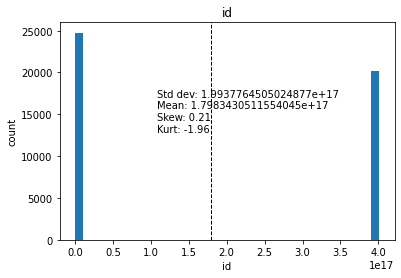

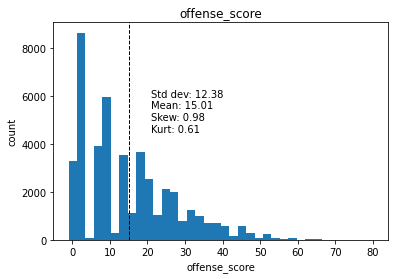

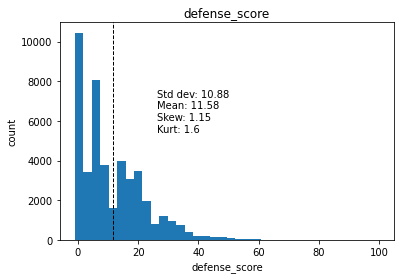

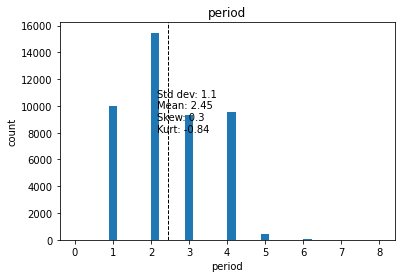

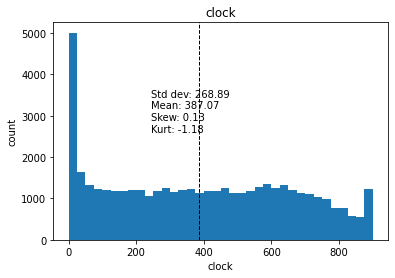

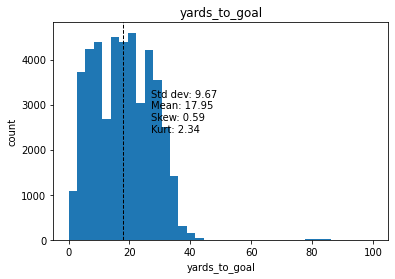

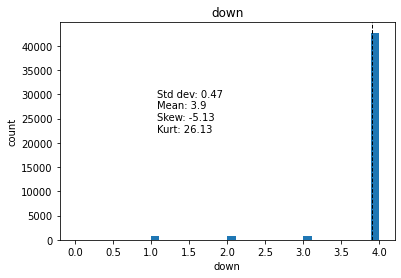

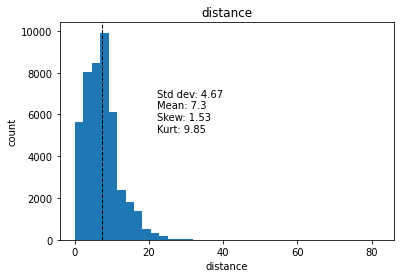

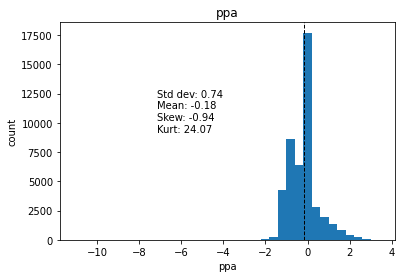

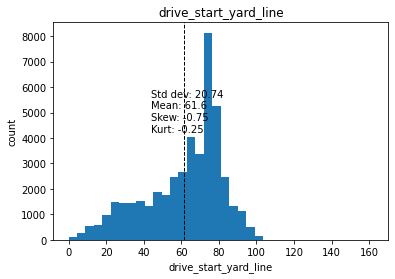

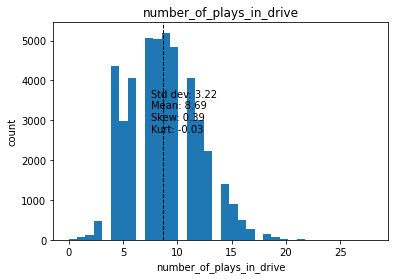

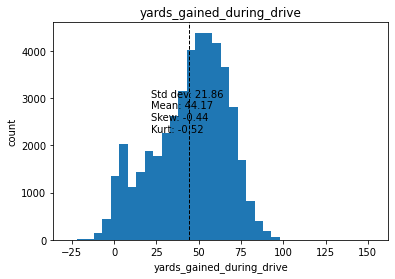

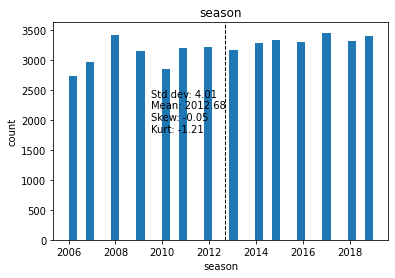

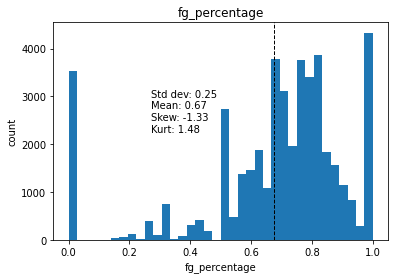

In [0]:
#Create histograms for univariate stats
def histograms(df, feature):
  from matplotlib import pyplot as plt
  import pandas as pd

  plt.hist(df[feature], bins=int(round(df[feature].count()**(1/3), 0)))

  text  = 'Std dev: ' + str(round(df[feature].std(), 2)) + '\n'
  text += 'Mean: ' + str(round(df[feature].mean(), 2)) + '\n'
  text += 'Skew: ' + str(round(df[feature].skew(), 2)) + '\n'
  text += 'Kurt: ' + str(round(df[feature].kurt(), 2))

  # plt.text(horizontal position, vertical position, text, ...)
  #          vertical and horizontal positions are percents on decimal form from 0 to 1
  #          vertical=0 starts at the far left; higher numbers push the text right
  #          horizontal=0 starts at the bottom; higher  numbers push the text up
  plt.text(0.35, 0.5, text, fontsize=10, transform=plt.gcf().transFigure)
  plt.axvline(df[feature].mean(), color='k', linestyle='dashed', linewidth=1)
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.show()

import pandas as pd
df=pd.read_csv('https://jasonstewart.s3.amazonaws.com/college-football-data.csv')
for col in df:
  if pd.api.types.is_numeric_dtype(df[col]):
    histograms(df,col)

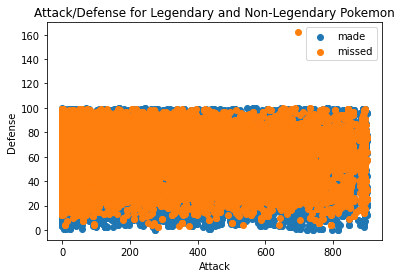

In [0]:
#Start getting into scatterplots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
      # Create the scatter plots; both on the same object: plt


made = df[df.fg_result == 1]
missed = df[df.fg_result == 0]

plt.scatter(made.clock, made.drive_start_yard_line, label='made')
plt.scatter(missed.clock, missed.drive_start_yard_line, label='missed')

# Add a legend, title, and labels
plt.legend()
plt.title('Attack/Defense for Legendary and Non-Legendary Pokemon')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

